In [100]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
df = pd.read_csv('../data/CSVFILES/annotations_enhanced.csv')
df_short = pd.read_csv('../data/CSVFILES/annotations.csv')

In [12]:
print ('Enhanced shape',df.shape)
print ('Enhanced columns__________________________________')
print (list(df))
print ('Original shape',df_short.shape)
print ('Original columns__________________________________')
print (list(df_short))

Enhanced shape (1172, 23)
Enhanced columns__________________________________
['seriesuid', 'coordX', 'coordY', 'coordZ', 'diameter_mm', 'Xorig', 'Yorig', 'Zorig', 'Xspac', 'Yspac', 'Zspac', 'Xnpy', 'Ynpy', 'Znpy', 'subtlety', 'internal_structure', 'calcification', 'sphericity', 'margin', 'lobulation', 'spiculation', 'texture', 'malignancy']
Original shape (1186, 5)
Original columns__________________________________
['seriesuid', 'coordX', 'coordY', 'coordZ', 'diameter_mm']


In [ ]:
df.describe([.25, .5, .75])

In [13]:
import SimpleITK as sitk
import numpy as np
itkimage = sitk.ReadImage('../data/subset2/1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405.mhd')
img = sitk.GetArrayFromImage(itkimage)
origin = np.array(list(reversed(itkimage.GetOrigin()))) # zyx

In [14]:
origin

array([-657.        ,    9.48041606, -120.049467  ])

In [15]:
df[df['seriesuid']=='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405']

,seriesuid,coordX,coordY,coordZ,diameter_mm,Xorig,Yorig,Zorig,Xspac,Yspac,...,Znpy,subtlety,internal_structure,calcification,sphericity,margin,lobulation,spiculation,texture,malignancy
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262,-120.049467,9.480416,-657.0,0.556641,0.556641,...,265.918724,4.50,[ 1. 0. 0. 0.],[ 0. 0. 0. 0. 0. 1.],[ 0. 1. 0.],4.75,1.75,1.50,[ 0. 0. 1.],3.75
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150,-120.049467,9.480416,-657.0,0.556641,0.556641,...,251.506268,5.00,[ 1. 0. 0. 0.],[ 0. 0. 0. 0. 0. 1.],[ 0. 0.25 0.75],4.75,1.75,1.50,[ 0. 0. 1.],4.25
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,90.931713,149.027266,-426.544715,18.208570,-120.049467,9.480416,-657.0,0.556641,0.556641,...,230.455285,5.00,[ 1. 0. 0. 0.],[ 0. 0. 0. 0. 0. 1.],[ 0. 0.5 0.5],5.00,1.75,1.25,[ 0. 0. 1.],3.75
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,89.540769,196.405159,-515.073322,16.381276,-120.049467,9.480416,-657.0,0.556641,0.556641,...,141.926678,4.75,[ 1. 0. 0. 0.],[ 0. 0. 0. 0. 0. 1.],[ 0. 0.25 0.75],4.25,1.50,1.50,[ 0. 0.5 0.5],3.75


In [16]:
def recenterX(ROW):
    return np.abs(ROW['coordX']-ROW['Xorig'])
def recenterY(ROW):
    return np.abs(ROW['coordY']-ROW['Yorig'])
def recenterZ(ROW):
    return np.abs(ROW['coordZ']-ROW['Zorig'])

In [17]:
df['coordX_0'] = df.apply (lambda row: recenterX (row), axis=1)
df['coordY_0'] = df.apply (lambda row: recenterY (row), axis=1)
df['coordZ_0'] = df.apply (lambda row: recenterZ (row), axis=1)

In [18]:
X = list(df['coordX_0'])
Y = list(df['coordY_0'])
Z = list(df['coordZ_0'])

In [333]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

Z_c,X_c,Y_c = [0,0,0]
ax.w_xaxis.set_pane_color((X_c, X_c, X_c, X_c))
ax.w_yaxis.set_pane_color((Z_c, Z_c, Z_c, Z_c))
ax.w_zaxis.set_pane_color((Y_c, Y_c, Y_c, Y_c))

ax.scatter(X, Y, Z)

# ax.grid(False)
ax.w_xaxis.pane.set_edgecolor('black')
ax.w_yaxis.pane.set_edgecolor('black')
ax.w_zaxis.pane.set_edgecolor('black')
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
# ax.view_init(elev=10, azim=135)

ax.xaxis._axinfo['tick']['inward_factor'] = 0
ax.xaxis._axinfo['tick']['outward_factor'] = 0
ax.yaxis._axinfo['tick']['inward_factor'] = 0
ax.yaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['inward_factor'] = 0
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.zaxis._axinfo['tick']['outward_factor'] = 0
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.savefig('./figs/3Dscatter_nodules.png', transparent=True, bbox_inches='tight')

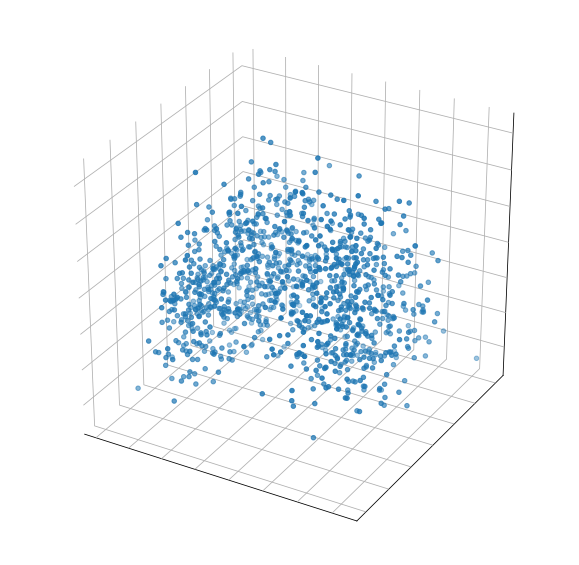

In [334]:
plt.show()

In [21]:
print ('X min,max',min(X),max(X))
print ('Y min,max',min(Y),max(Y))
print ('Z min,max',min(Z),max(Z))

X min,max 8.2437338 359.4990234
Y min,max 51.92375755 347.4381557
Z min,max 31.7264813 353.4654562


In [94]:
df['lobulation'].describe()

count    1172.000000
mean        1.734258
std         0.733314
min         1.000000
25%         1.250000
50%         1.500000
75%         2.000000
max         4.750000
Name: lobulation, dtype: float64

In [95]:
df['malignancy'].describe()

count    1172.000000
mean        2.955174
std         0.926831
min         1.000000
25%         2.500000
50%         3.000000
75%         3.500000
max         5.000000
Name: malignancy, dtype: float64

In [97]:
df['spiculation'].describe()

count    1172.000000
mean        1.602115
std         0.796860
min         1.000000
25%         1.000000
50%         1.333333
75%         1.750000
max         5.000000
Name: spiculation, dtype: float64

In [96]:
df['diameter_mm'].describe()

count    1172.000000
mean        8.327235
std         4.771419
min         3.253443
25%         5.114802
50%         6.440067
75%         9.710282
max        32.270030
Name: diameter_mm, dtype: float64

In [98]:
data_boxplot_3 = [np.array(df['malignancy']),
                np.array(df['spiculation']),
                np.array(df['lobulation'])]
data_boxplot_1 = [np.array(df['diameter_mm'])]
data_labels_3 = ['Malignancy','Spiculation','Lobulation']
data_labels_1 = ['Diameter (mm)']

In [395]:

fig = plt.figure(figsize=(14,14)) 
gs = gridspec.GridSpec(1,2,width_ratios=[3,1])
lw = 3

boxprops = dict(linestyle='-', linewidth=lw) #, color='darkgoldenrod')
meanlineprops = dict(linestyle='-', linewidth=lw+1) #, color='purple')
flierprops = dict(color='purple')

ax0 = plt.subplot(gs[0])
bp_dict_3 = ax0.boxplot(data_boxplot_3,1,'o',0.75,showmeans=True, meanline=True,
                        boxprops=boxprops, meanprops=meanlineprops,showfliers=True,
                       flierprops=flierprops)
for whisker in bp_dict_3['whiskers']:
    whisker.set(linewidth=lw)
for cap in bp_dict_3['caps']:
    cap.set(linewidth=lw)
ax0.yaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.5)
xtickNames = plt.setp(ax0,xticklabels=np.repeat(data_labels_3,1))
plt.setp(xtickNames, fontsize=24)
plt.setp(bp_dict_3['medians'], linewidth=lw+1)
plt.rc('ytick',labelsize=24)

x_shift = [1.35,2.35,3.35]
x_shift_w = [1.35,1.35,2.35,2.35,3.35,3.35]
y_shift_mean = [-0.1,-0.1,0]
for line in bp_dict_3['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    print (x,x_shift[list(bp_dict_3['medians']).index(line)])
    ax0.text(x_shift[list(bp_dict_3['medians']).index(line)], y, '%.2f' % y,
         horizontalalignment='center',
         verticalalignment='baseline',
         fontsize=24,color='orange')
for line in bp_dict_3['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax0.text(x_shift[list(bp_dict_3['means']).index(line)], y+y_shift_mean[list(bp_dict_3['means']).index(line)], '%.2f' % y,
         horizontalalignment='center',
         verticalalignment='baseline',
         fontsize=24,color='green')

for line in bp_dict_3['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    ax0.text(x_shift[list(bp_dict_3['boxes']).index(line)],y, '%.2f' % y,
         horizontalalignment='center', # centered
         verticalalignment='center',
         fontsize=24)      # below
    x, y = line.get_xydata()[5] # bottom of right line
    ax0.text(x_shift[list(bp_dict_3['boxes']).index(line)],y, '%.2f' % y,
         horizontalalignment='center', # centered
         verticalalignment='top',
         fontsize=24)      # below
for line in bp_dict_3['caps']:
    x, y = line.get_xydata()[1] # bottom of left line
    ax0.text(x_shift_w[list(bp_dict_3['caps']).index(line)],y, '%.2f' % y,
         horizontalalignment='center', # centered
         verticalalignment='center',
         fontsize=24)      # below


ax1 = plt.subplot(gs[1])
bp_dict_1 = ax1.boxplot(data_boxplot_1,1,'o',0.75, showmeans=True, meanline=True,
                        boxprops=boxprops, meanprops=meanlineprops,showfliers=True,
                       flierprops=flierprops)
for whisker in bp_dict_1['whiskers']:
    whisker.set(linewidth=lw)
for cap in bp_dict_1['caps']:
    cap.set(linewidth=lw)
ax1.yaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.5)
xtickNames = plt.setp(ax1,xticklabels=np.repeat(data_labels_1,1))
plt.setp(xtickNames, fontsize=24)
plt.setp(bp_dict_1['medians'], linewidth=lw+1)
plt.rc('ytick',labelsize=24)

x_shift = 1.275
for line in bp_dict_1['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax1.text(x_shift, y, '%.2f' % y,
         horizontalalignment='center',
         verticalalignment='baseline',
         fontsize=24,color='orange')
for line in bp_dict_1['means']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax1.text(x_shift, y, '%.2f' % y,
         horizontalalignment='center',
         verticalalignment='baseline',
         fontsize=24,color='green')

for line in bp_dict_1['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    ax1.text(x_shift,y, '%.2f' % y,
         horizontalalignment='center', # centered
         verticalalignment='center',
         fontsize=24)      # below
    x, y = line.get_xydata()[5] # bottom of right line
    ax1.text(x_shift,y, '%.2f' % y,
         horizontalalignment='center', # centered
         verticalalignment='top',
         fontsize=24)      # below
for line in bp_dict_1['caps']:
    x, y = line.get_xydata()[1] # bottom of left line
    ax1.text(x_shift,y, '%.2f' % y,
         horizontalalignment='center', # centered
         verticalalignment='center',
         fontsize=24)      # below

plt.tight_layout()
plt.savefig('./figs/annotations_Boxplot.png', transparent=True, bbox_inches='tight')

1.075 1.35
2.075 2.35
3.075 3.35


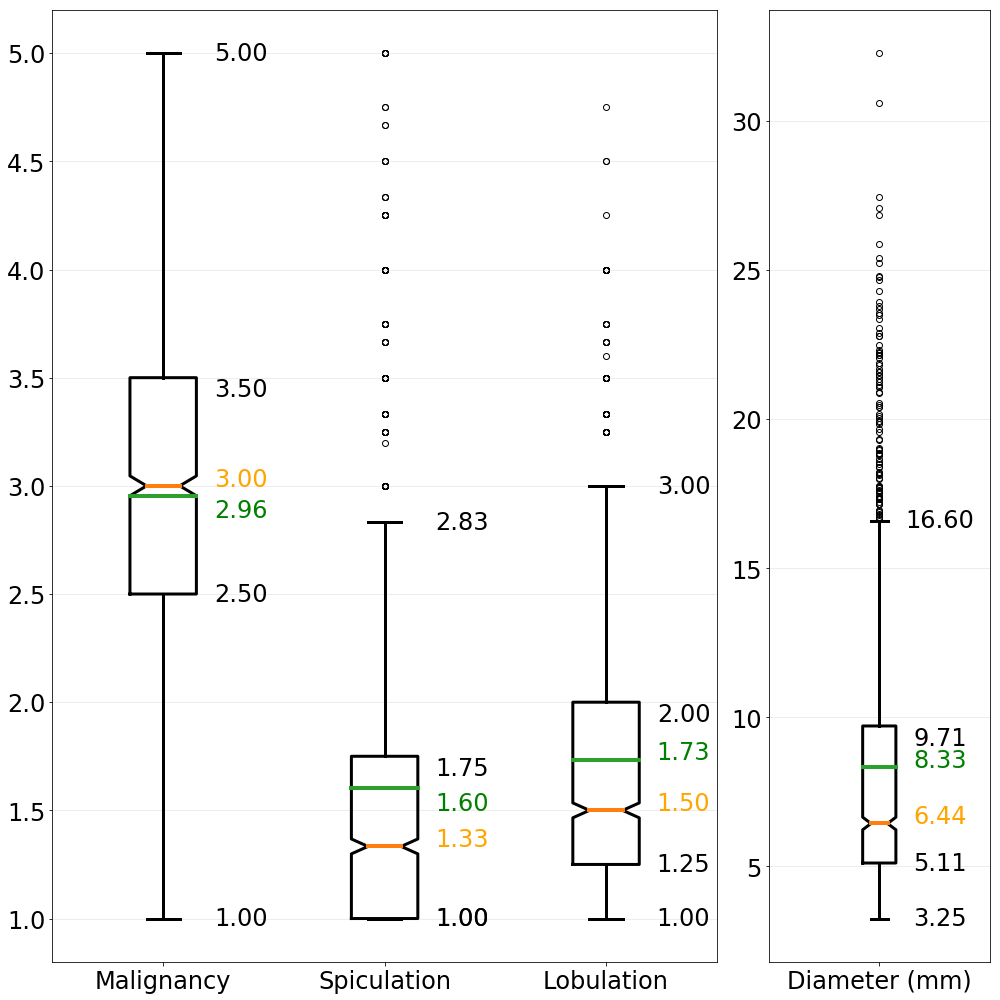

In [396]:
plt.show()

In [138]:
fig = plt.figure(figsize=(10,10)) 
gs = gridspec.GridSpec(1,2,width_ratios=[3,1]) 

ax0 = plt.subplot(gs[0])
ax0.boxplot(data_boxplot_3,1,'',0.75, showmeans=True)
ax0.yaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.5)
xtickNames = plt.setp(ax0,xticklabels=np.repeat(data_labels_3,1))
plt.setp(xtickNames, fontsize=16)

ax1 = plt.subplot(gs[1])
ax1.boxplot(data_boxplot_1,1,'',0.75, showmeans=True)
ax1.yaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.5)
xtickNames = plt.setp(ax1,xticklabels=np.repeat(data_labels_1,1))
plt.setp(xtickNames, fontsize=16)

plt.tight_layout()
plt.savefig('./figs/annotations_Boxplot.png', transparent=True, bbox_inches='tight')

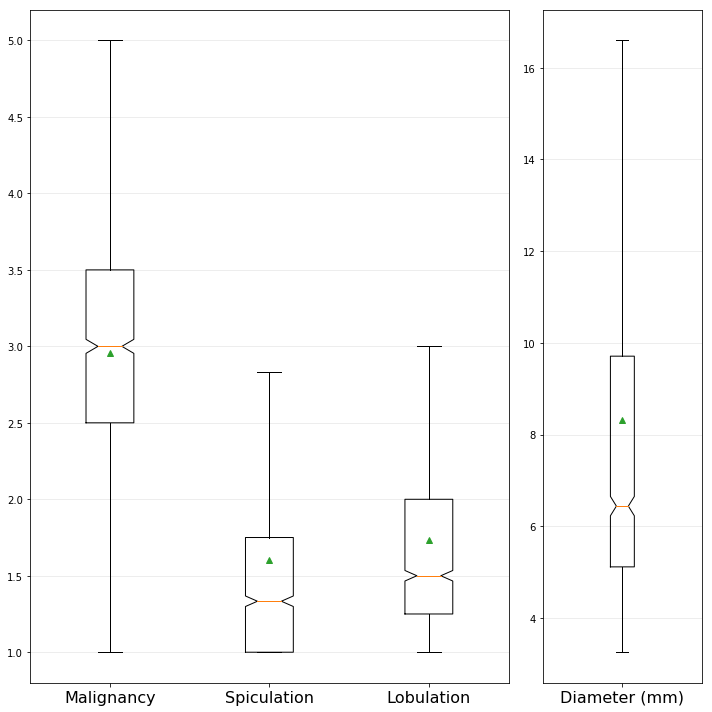

In [139]:
plt.show()

In [220]:
from pylab import *

fig = plt.figure(figsize=(10,10)) 
gs = gridspec.GridSpec(1,2,width_ratios=[3,1]) 

ax0 = plt.subplot(gs[0])
bp_dict_3 = ax0.boxplot(data_boxplot_3,1,'',0.75,showmeans=True, meanline=True)
ax0.yaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.5)
xtickNames = plt.setp(ax0,xticklabels=np.repeat(data_labels_3,1))
plt.setp(xtickNames, fontsize=16)
plt.setp(bp_dict_3['medians'], linewidth=2)
plt.rc('ytick',labelsize=12)

x_shift = [1.25,2.25,3.25]
for line in bp_dict_3['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax0.text(x_shift[list(bp_dict_3['medians']).index(line)], y, '%.1f' % y,
         horizontalalignment='center',
         verticalalignment='baseline',
         fontsize=12)

for line in bp_dict_3['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    ax0.text(x_shift[list(bp_dict_3['boxes']).index(line)],y, '%.1f' % y,
         horizontalalignment='center', # centered
         verticalalignment='center',
         fontsize=12)      # below
    x, y = line.get_xydata()[5] # bottom of right line
    ax0.text(x_shift[list(bp_dict_3['boxes']).index(line)],y, '%.1f' % y,
         horizontalalignment='center', # centered
         verticalalignment='top',
         fontsize=12)      # below


ax1 = plt.subplot(gs[1])
bp_dict_1 = ax1.boxplot(data_boxplot_1,1,'',0.75, showmeans=True, meanline=True)
ax1.yaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.5)
xtickNames = plt.setp(ax1,xticklabels=np.repeat(data_labels_1,1))
plt.setp(xtickNames, fontsize=16)
plt.setp(bp_dict_1['medians'], linewidth=2)
plt.rc('ytick',labelsize=12)

x_shift = 1.175
for line in bp_dict_1['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    ax1.text(x_shift, y, '%.1f' % y,
         horizontalalignment='center',
         verticalalignment='baseline',
         fontsize=12)

for line in bp_dict_1['boxes']:
    x, y = line.get_xydata()[0] # bottom of left line
    ax1.text(x_shift,y, '%.1f' % y,
         horizontalalignment='center', # centered
         verticalalignment='center',
         fontsize=12)      # below
    x, y = line.get_xydata()[5] # bottom of right line
    ax1.text(x_shift,y, '%.1f' % y,
         horizontalalignment='center', # centered
         verticalalignment='top',
         fontsize=12)      # below

plt.tight_layout()
plt.savefig('./figs/annotations_Boxplot.png', transparent=True, bbox_inches='tight')

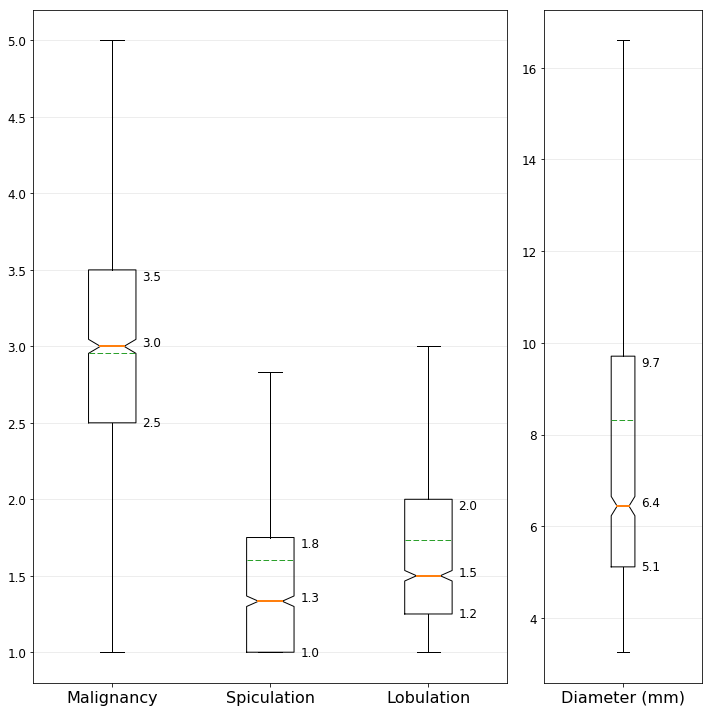

In [221]:
plt.show()

In [110]:
nodules_by_patient = {}
for patient in list(set(df['seriesuid'])):
    nodules_by_patient[patient] = list(df['seriesuid']).count(patient)

In [123]:
df['seriesuid'].unique().shape

(595,)

In [112]:
max(nodules_by_patient.values())

12

In [119]:
num_patientslen(list(nodules_by_patient.values()))

595

In [125]:
for i in range(13):
    print (i,list(nodules_by_patient.values()).count(i),list(nodules_by_patient.values()).count(i)/595.)

0 0 0.0
1 309 0.519327731092437
2 156 0.26218487394957984
3 61 0.10252100840336134
4 25 0.04201680672268908
5 22 0.03697478991596639
6 11 0.018487394957983194
7 4 0.0067226890756302525
8 2 0.0033613445378151263
9 4 0.0067226890756302525
10 0 0.0
11 0 0.0
12 1 0.0016806722689075631


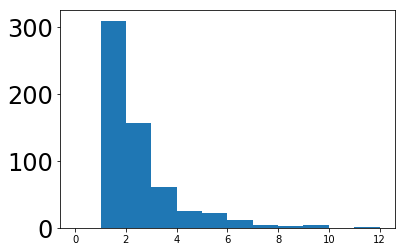

In [378]:
plt.hist(list(nodules_by_patient.values()),bins=range(0,13),label='hst')
plt.show()

In [114]:
df[df['seriesuid']=='1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059']

,seriesuid,coordX,coordY,coordZ,diameter_mm,Xorig,Yorig,Zorig,Xspac,Yspac,...,calcification,sphericity,margin,lobulation,spiculation,texture,malignancy,coordX_0,coordY_0,coordZ_0
23,1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...,46.188539,48.402806,-108.578632,13.596471,-187.699997,-108.300003,-194.0,0.548828,0.548828,...,[ 0. 0. 0. 0. 0. 1.],[ 0. 1. 0.],4.000000,1.750000,2.25,[ 0. 0. 1.],5.0,233.888536,156.702809,85.421368
24,1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524...,36.392044,76.771663,-123.321911,4.343200,-187.699997,-108.300003,-194.0,0.548828,0.548828,...,[ 0. 0. 0. 0. 0. 1.],[ 0. 1. 0.],2.333333,1.333333,1.00,[ 0.33333333 0. 0.66666667],3.0,224.092041,185.071666,70.678089


In [130]:
df['diameter_mm'].describe()

count    1172.000000
mean        8.327235
std         4.771419
min         3.253443
25%         5.114802
50%         6.440067
75%         9.710282
max        32.270030
Name: diameter_mm, dtype: float64

In [131]:
list(df['diameter_mm']).index(max(df['diameter_mm']))

759

In [135]:
df.iloc[[759]]

,seriesuid,coordX,coordY,coordZ,diameter_mm,Xorig,Yorig,Zorig,Xspac,Yspac,...,calcification,sphericity,margin,lobulation,spiculation,texture,malignancy,coordX_0,coordY_0,coordZ_0
759,1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644...,67.827256,85.379925,-109.746724,32.27003,-212.199997,-210.0,-338.0,0.820312,0.820312,...,[ 0. 0. 0. 0. 0. 1.],[ 0. 0.33333333 0.66666667],4.666667,1.333333,1.0,[ 0. 0. 1.],4.0,280.027253,295.379925,228.253276
